<a href="https://colab.research.google.com/github/Guill2/PyMath-Lab/blob/main/PyMath_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyMath-Lab**

## **Grupo: PyCode**

## **Integrantes:**

- Axel Rodrigo Juarez Quevedo
- Guillermo Alexander Rodríguez Cortez
- Salvador Isaías Juárez Alcántara
- Christopher Alexander Romero Méndez

## **Análisis de Puntuaciones de Exámenes**

Este análisis se basa en un conjunto de datos que busca estudiar el impacto de diferentes factores sobre las puntuaciones de los exámenes de matemáticas de los estudiantes. Las variables estudiadas incluyen el género, la raza/etnia, el nivel educativo de los padres, el tipo de almuerzo que reciben, y si tomaron un curso de preparación para el examen.

### **Descripción de las columnas**

A continuación, se describe cada una de las columnas presentes en el dataset:

1. **gender**: Género del estudiante (masculino/femenino).
2. **race/ethnicity**: Raza o etnia del estudiante. Es una de las cinco categorías raciales o étnicas disponibles.
3. **parent_education_level**: Nivel educativo más alto alcanzado por los padres del estudiante. Los valores posibles son: **sin educación**, **secundaria**, **técnico**, **licenciatura**, **máster**.
4. **lunch**: Tipo de almuerzo proporcionado al estudiante. Los valores son **estándar** o **gratis/reducido**.
5. **test_prep_course**: Indica si el estudiante completó un curso de preparación para el examen. Los valores posibles son: **completado** o **ninguno**.
6. **math**: Puntuación obtenida por el estudiante en el examen de matemáticas (rango de 0 a 100).

### **Objetivo del análisis**

El objetivo de este análisis es explorar cómo diferentes características del estudiante (género, raza/etnia, educación de los padres, tipo de almuerzo, y preparación para el examen) pueden influir en el rendimiento académico en matemáticas. Buscando entender qué factores podrían ser determinantes y cómo se relacionan entre sí.

### **Enfoque del análisis**

En el análisis se utilizarán varios tipos de gráficos para estudiar las distribuciones y relaciones entre las variables. Estos gráficos nos permitirán identificar patrones o diferencias importantes en las puntuaciones de matemáticas de los estudiantes, basándonos en las características mencionadas anteriormente.





---



# **Limpieza y Preprocesado del DataSet**

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV
url = 'https://raw.githubusercontent.com/Guill2/PyMath-Lab/main/dataSet_Estudiantes/student-mat.csv'
df = pd.read_csv(url)

# Ver las primeras filas del dataset para asegurarnos de que se ha cargado correctamente
print("Primeras 6 filas del dataset:")
print(df.head(6))

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(df.describe())

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Tratamiento de valores nulos (rellenar con la media en caso de ser necesario)
# Se hace solo en las columnas numéricas para evitar alteración en las columnas categóricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verificar si ahora hay valores nulos
print("\nValores nulos después del tratamiento:")
print(df.isnull().sum())

# Conversión de tipos de datos para columnas categóricas
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test_prep_course'] = df['test_prep_course'].astype('category')

# Normalización de la columna 'math' (normalización MinMax)
scaler = MinMaxScaler()
df[['math']] = scaler.fit_transform(df[['math']])

# Información final sobre el dataset limpio
print("\nInformación final después de la limpieza y preprocesamiento:")
print(df.info())

# Mostrar el tamaño del dataset
print("\nNúmero de filas y columnas después del preprocesado:")
print(df.shape)


Primeras 6 filas del dataset:
   gender race/ethnicity parent_education_level         lunch  \
0  female        group B      bachelor's degree      standard   
1  female        group C           some college      standard   
2  female        group B        master's degree      standard   
3    male        group A     associate's degree  free/reduced   
4    male        group C           some college      standard   
5  female        group B     associate's degree      standard   

  test_prep_course  math  
0             none    72  
1        completed    69  
2             none    90  
3             none    47  
4             none    76  
5             none    71  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1

### **Tabla Ordenada**

In [52]:
# Ver las primeras filas del dataset para asegurarnos de que se ha cargado correctamente
print("Primeras 6 filas del dataset:")
display(df.head(6))  # Mostrar las primeras 6 filas en formato tabla ordenada

Primeras 6 filas del dataset:


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,0.72
1,female,group C,some college,standard,completed,0.69
2,female,group B,master's degree,standard,none,0.90
3,male,group A,associate's degree,free/reduced,none,0.47
4,male,group C,some college,standard,none,0.76
5,female,group B,associate's degree,standard,none,0.71




---



# **Gráficos de los Datos Obtenidos**

## **1. Distribución de las puntuaciones de matemáticas por género**

Este gráfico muestra cómo se distribuyen las puntuaciones de matemáticas para los estudiantes de género masculino y femenino. Permite observar si existen diferencias significativas en la dispersión de las notas, la mediana, y los posibles valores atípicos (outliers) entre los géneros.


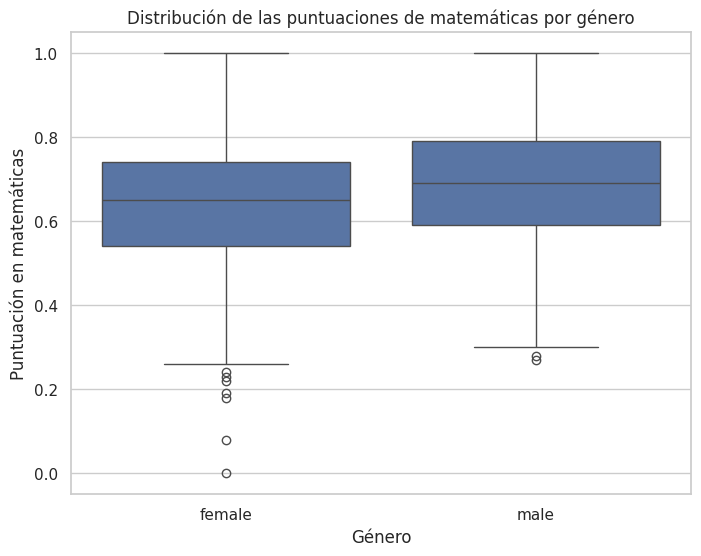

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplot para comparar la distribución de las notas de matemáticas por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='math', data=df)
plt.title('Distribución de las puntuaciones de matemáticas por género')
plt.xlabel('Género')
plt.ylabel('Puntuación en matemáticas')
plt.show()

**Conclusión:** El gráfico de caja muestra si existen diferencias notables entre las puntuaciones de matemáticas de los estudiantes masculinos y femeninos. En caso de observarse una mediana o una dispersión significativamente diferente entre géneros, esto podría indicar que existen factores relacionados con el género que afectan el rendimiento académico en matemáticas. Sin embargo, es importante investigar otros factores que podrían estar influyendo, como el acceso a recursos o el apoyo familiar.




---



## **2. Promedio de puntuación en matemáticas por raza/etnia**

En este gráfico de barras, comparamos el promedio de las puntuaciones en matemáticas entre diferentes grupos raciales/étnicos. Este análisis nos puede ayudar a entender si existen brechas de rendimiento entre los diferentes grupos.


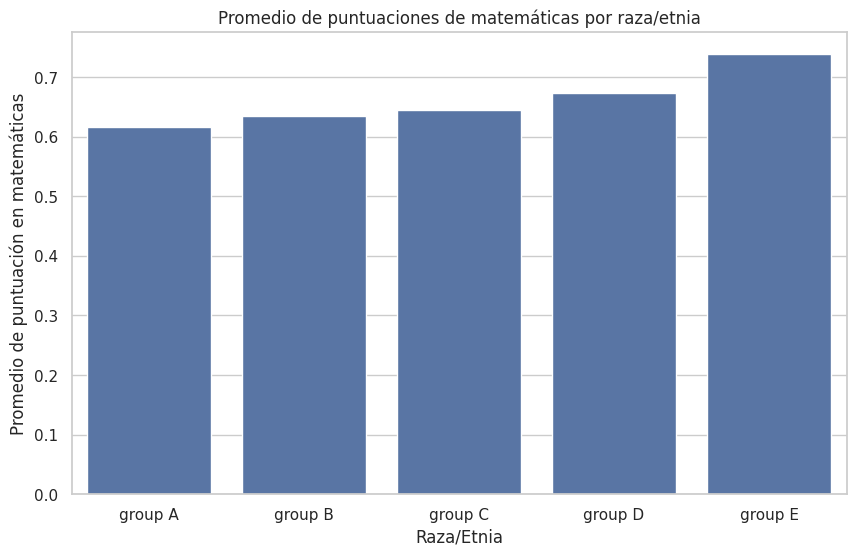

In [56]:
# Calcular el promedio de matemáticas por raza/etnia
race_avg = df.groupby('race/ethnicity', observed=True)['math'].mean().reset_index()

# Crear gráfico de barras para el promedio de las puntuaciones de matemáticas por raza/etnia
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='math', data=race_avg)
plt.title('Promedio de puntuaciones de matemáticas por raza/etnia')
plt.xlabel('Raza/Etnia')
plt.ylabel('Promedio de puntuación en matemáticas')
plt.show()


**Conclusión:** El gráfico revela variaciones en las puntuaciones promedio de matemáticas entre diferentes grupos raciales/étnicos. Algunos grupos tienen un desempeño significativamente más alto que otros, lo que sugiere la necesidad de explorar posibles factores que afecten estas diferencias.




---



## **3. Impacto de la educación de los padres en las puntuaciones de matemáticas**

Este gráfico de barras muestra cómo el nivel educativo de los padres influye en el rendimiento de los estudiantes en matemáticas. A través de este análisis, se puede observar si los estudiantes cuyos padres tienen un mayor nivel educativo tienen mejores puntuaciones en matemáticas. Esto podría indicar que el nivel educativo de los padres afecta la motivación, el apoyo académico o el entorno de aprendizaje del estudiante.


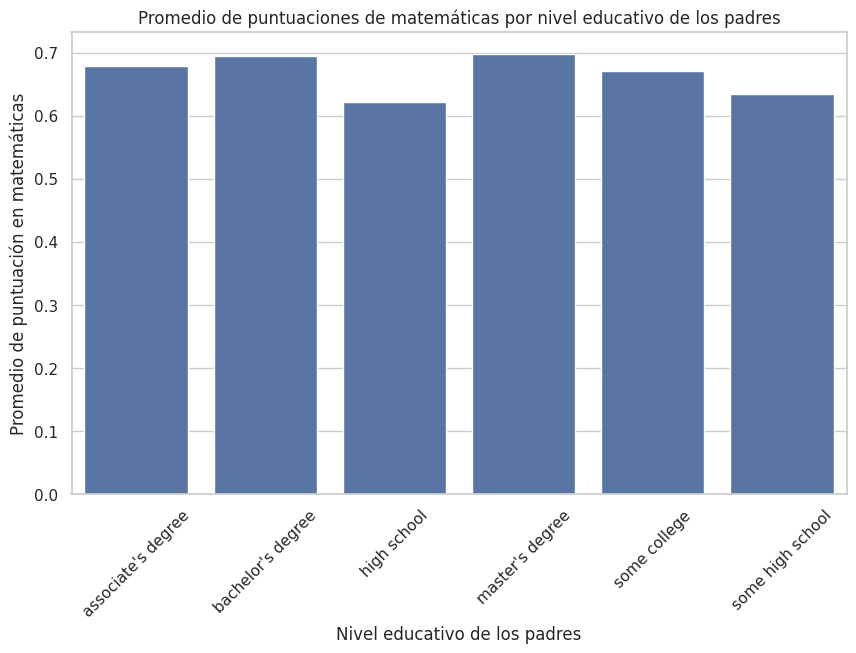

In [58]:
# Calcular el promedio de matemáticas por el nivel educativo de los padres
education_avg = df.groupby('parent_education_level')['math'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='parent_education_level', y='math', data=education_avg)
plt.title('Promedio de puntuaciones de matemáticas por nivel educativo de los padres')
plt.xlabel('Nivel educativo de los padres')
plt.ylabel('Promedio de puntuación en matemáticas')
plt.xticks(rotation=45)
plt.show()


**Conclusión:** El gráfico sugiere que el nivel educativo de los padres tiene un impacto positivo en las puntuaciones de matemáticas de los estudiantes. Aquellos con padres con niveles educativos más altos tienden a obtener mejores resultados en matemáticas. Este hallazgo indica que la educación de los padres puede influir en las expectativas, el apoyo académico y el ambiente de aprendizaje de los estudiantes, lo que se traduce en un mejor rendimiento académico.



---



## **4. Efecto de la preparación para exámenes en las puntuaciones de matemáticas**

Este gráfico compara los promedios de las puntuaciones en matemáticas entre los estudiantes que tomaron un curso de preparación para exámenes y los que no lo hicieron. Este análisis es útil para determinar si la preparación adicional tiene un impacto positivo en el rendimiento académico de los estudiantes. Si los estudiantes que tomaron el curso obtienen mejores resultados, sería interesante explorar la efectividad del curso de preparación y si debe ser promovido entre otros estudiantes.


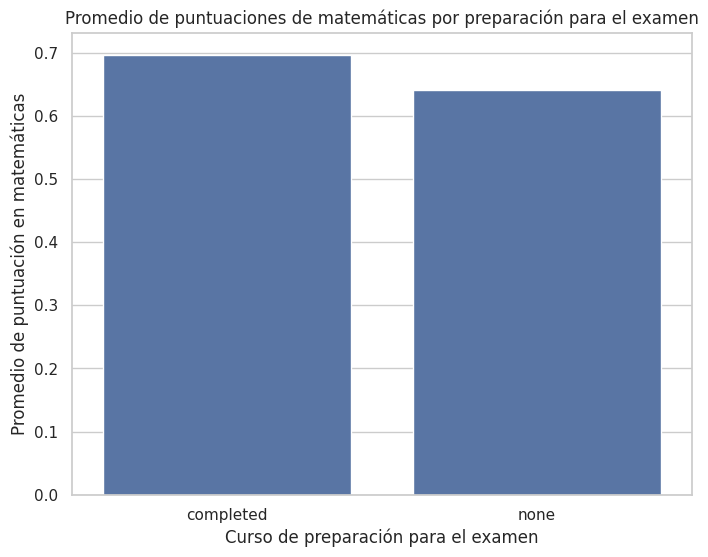

In [60]:
# Calcular el promedio de matemáticas por preparación para el examen
test_prep_avg = df.groupby('test_prep_course', observed=True)['math'].mean().reset_index()

# Crear gráfico de barras para el promedio de las puntuaciones de matemáticas por preparación para el examen
plt.figure(figsize=(8, 6))
sns.barplot(x='test_prep_course', y='math', data=test_prep_avg)
plt.title('Promedio de puntuaciones de matemáticas por preparación para el examen')
plt.xlabel('Curso de preparación para el examen')
plt.ylabel('Promedio de puntuación en matemáticas')
plt.show()

**Conclusión:** Los estudiantes que tomaron el curso de preparación para exámenes tienden a tener un rendimiento superior en matemáticas en comparación con aquellos que no lo hicieron. Esto sugiere que los cursos de preparación para exámenes pueden ser efectivos para mejorar las habilidades y las puntuaciones académicas. Las instituciones educativas podrían considerar la implementación de estos programas como una forma de mejorar el rendimiento general de los estudiantes.



---



## **5. Efecto del tipo de almuerzo en las puntuaciones de matemáticas**

Este gráfico muestra el impacto del tipo de almuerzo (estándar o gratuito/reducido) en las puntuaciones de matemáticas. El análisis busca identificar si existe alguna diferencia en las puntuaciones entre estudiantes que reciben almuerzo estándar y aquellos que tienen acceso a almuerzo gratuito o reducido. Las disparidades en el rendimiento podrían sugerir que el tipo de almuerzo está relacionado con la situación socioeconómica de los estudiantes, lo que podría influir en su desempeño académico.


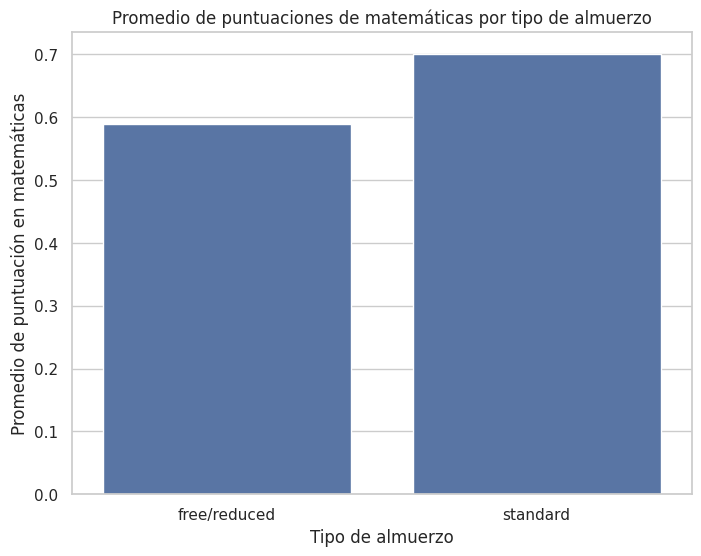

In [64]:
# Calcular el promedio de matemáticas por tipo de almuerzo
lunch_avg = df.groupby('lunch', observed=True)['math'].mean().reset_index()

# Crear gráfico de barras para el promedio de las puntuaciones de matemáticas por tipo de almuerzo
plt.figure(figsize=(8, 6))
sns.barplot(x='lunch', y='math', data=lunch_avg)
plt.title('Promedio de puntuaciones de matemáticas por tipo de almuerzo')
plt.xlabel('Tipo de almuerzo')
plt.ylabel('Promedio de puntuación en matemáticas')
plt.show()


**Conclusión:** El análisis muestra que existe una diferencia en las puntuaciones de matemáticas entre los estudiantes que reciben almuerzo estándar y aquellos que reciben almuerzo gratuito o reducido. Esta diferencia podría reflejar el impacto de los factores socioeconómicos en el rendimiento académico, ya que los estudiantes que reciben almuerzo gratuito o reducido pueden estar enfrentando desafíos adicionales fuera del aula, como limitaciones económicas o falta de recursos. Mejorar el acceso a recursos y apoyo adicional podría ayudar a reducir estas disparidades en el rendimiento académico.



---



# **Conclusión Final del Análisis**

A través de los gráficos generados, hemos podido observar cómo diversas características del estudiante, como el género, la raza/etnia, la educación de los padres, el tipo de almuerzo y la preparación para el examen, influyen en las puntuaciones de matemáticas. En general, los resultados sugieren que:

- El género y la preparación para el examen tienen un impacto considerable en las puntuaciones de matemáticas, con diferencias notables entre los estudiantes que completaron el curso de preparación y aquellos que no.
- Las variaciones en el rendimiento académico también se reflejan en las diferencias entre los grupos raciales/étnicos, lo que podría indicar desigualdades en los recursos o el apoyo académico disponibles.
- Los estudiantes con almuerzo estándar tienden a obtener mejores resultados en comparación con aquellos con almuerzo gratuito/reducido, lo que puede estar relacionado con factores socioeconómicos.

Estos hallazgos indican que factores personales, sociales y educativos juegan un papel clave en el rendimiento académico de los estudiantes y resaltan la importancia de implementar estrategias de apoyo que aborden estas desigualdades para mejorar el éxito académico.
